In [42]:

import pandas as pd
import numpy as np

# URL de la base de datos Adult
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Nombres de las columnas según la documentación del dataset
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Cargar la base de datos
data = pd.read_csv(url, names=column_names, na_values="?", skipinitialspace=True)

#deleto 80% of the rows
data = data.sample(frac=0.05, random_state=42)

# Imprimir las primeras filas para inspección
print(data.info())
print(np.shape(data))

# if income is <=50K then 0, else 1
data['income'] = data['income'].apply(lambda x: 0 if x == '>50K' else 1)
print(data['income'].value_counts())


X = data.drop(columns='income')
y = data['income']



<class 'pandas.core.frame.DataFrame'>
Index: 1628 entries, 14160 to 1441
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1628 non-null   int64 
 1   workclass       1527 non-null   object
 2   fnlwgt          1628 non-null   int64 
 3   education       1628 non-null   object
 4   education-num   1628 non-null   int64 
 5   marital-status  1628 non-null   object
 6   occupation      1527 non-null   object
 7   relationship    1628 non-null   object
 8   race            1628 non-null   object
 9   sex             1628 non-null   object
 10  capital-gain    1628 non-null   int64 
 11  capital-loss    1628 non-null   int64 
 12  hours-per-week  1628 non-null   int64 
 13  native-country  1596 non-null   object
 14  income          1628 non-null   object
dtypes: int64(6), object(9)
memory usage: 203.5+ KB
None
(1628, 15)
income
1    1229
0     399
Name: count, dtype: int64


In [43]:
import sys
sys.path.append('C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive')
print(sys.path)  # Esto mostrará todas las rutas en sys.path

from model.preprocessing.data_cleaning import DataCleaner
from model.utils.data_analysis import DataAnalyzer
from model.preprocessing.feature_extraction import FeatureSelector,FeatureVisualizer



['C:\\Users\\juans\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\juans\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\juans\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\juans\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv', '', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\Pythonwin', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive']


C:\Users/juans/OneDrive/Documentos/iaProyect/Cognitive\model\preprocessing\data_cleaning.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.87590602  0.45401885 -0.72813659 ...  0.38013414 -1.46698374
  1.63617429]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.X.loc[:, columns_to_standardize] = self.scaler.fit_transform(self.X[columns_to_standardize])
C:\Users/juans/OneDrive/Documentos/iaProyect/Cognitive\model\preprocessing\data_cleaning.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.67926457 -1.47218042  0.67926457 ... -1.47218042 -1.47218042
 -1.47218042]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.X.loc[:, columns_to_standardize] = self.scaler.fit_transform(self.X[columns_to_standardize])
C:\Users/juans/OneDrive/Documentos/iaP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 100 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2454 non-null   float64
 1   workclass_1        2454 non-null   float64
 2   workclass_2        2454 non-null   float64
 3   workclass_3        2454 non-null   float64
 4   workclass_4        2454 non-null   float64
 5   workclass_5        2454 non-null   float64
 6   workclass_6        2454 non-null   float64
 7   workclass_7        2454 non-null   float64
 8   workclass_8        2454 non-null   float64
 9   fnlwgt             2454 non-null   float64
 10  education_1        2454 non-null   float64
 11  education_2        2454 non-null   float64
 12  education_3        2454 non-null   float64
 13  education_4        2454 non-null   float64
 14  education_5        2454 non-null   float64
 15  education_6        2454 non-null   float64
 16  education_7        2454

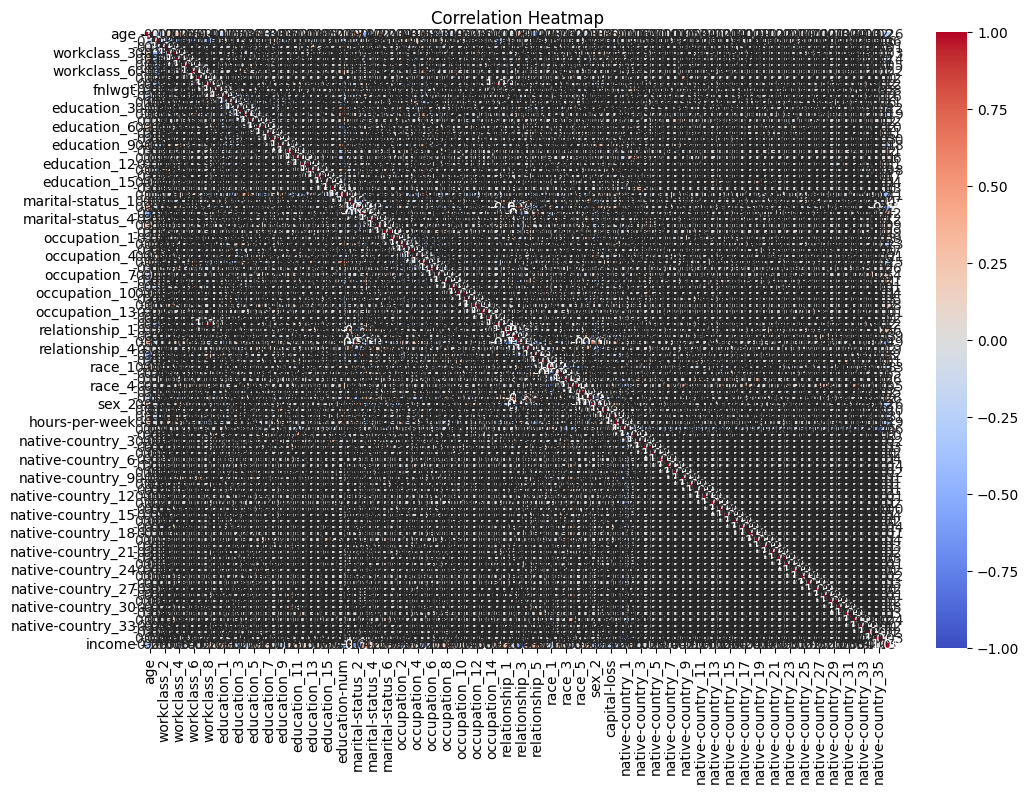

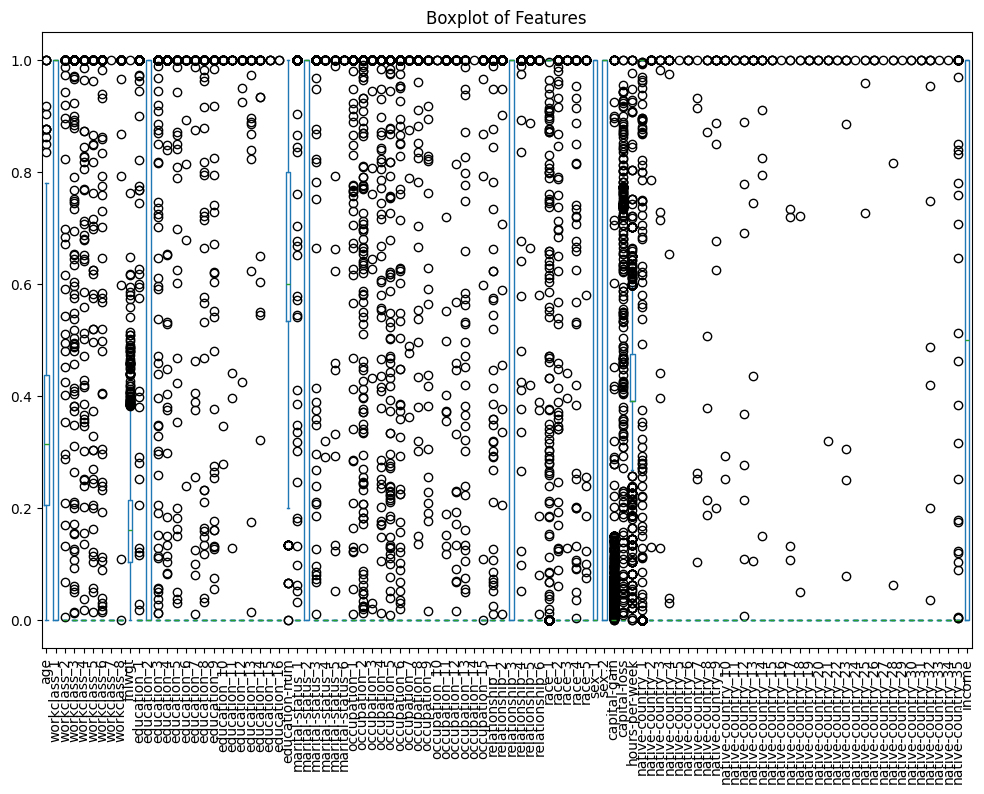

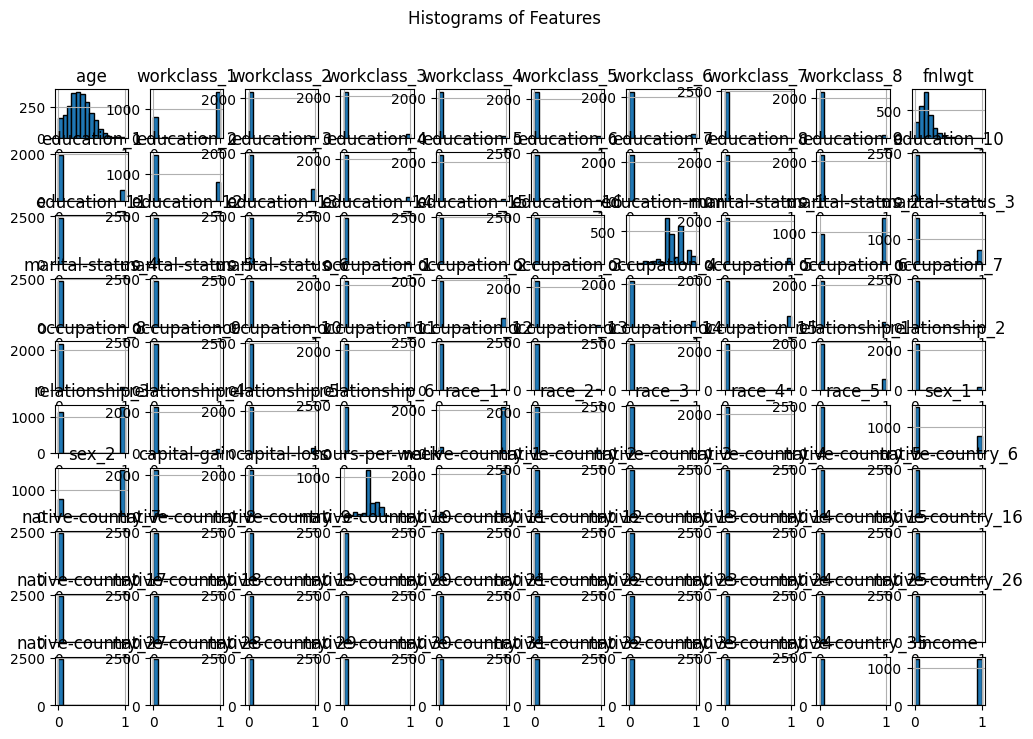

In [44]:


import pandas as pd
import numpy as np



# Instanciar y usar el preprocesador
preprocessor = DataCleaner(X, y)
data_analyzer = DataAnalyzer()


preprocessor.encode_features(target_column='income', method='onehot')

# Limpieza de duplicados y datos nulos
preprocessor.delete_null_data()
#preprocessor.delete_duplicate_rows()
#preprocessor.delete_Object_columns()

# Imputación de valores faltantes
#X_imputed = preprocessor.impute_missing_values()

# Estandarización
preprocessor.standardize()

# normalización
preprocessor.normalize_features()

#detectar y eliminar outliers
preprocessor.delete_outliers().value_counts()

#balancear datos
preprocessor.balance_data()

#generar columnas polinomiales
#xfold = preprocessor.generate_polynomial_columns()

#preprocessor.reduce_dimensionality(n_components=2,replace=True)

data = pd.concat([preprocessor.X, preprocessor.y], axis=1)
print(data_analyzer.describe_data(data=data))
data_analyzer.visualize_correlation(data=data)
data_analyzer.visualize_data(data, kind='boxplot')
data_analyzer.visualize_data(data, kind='histogram')




ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (14,) and arg 1 with shape (99,).

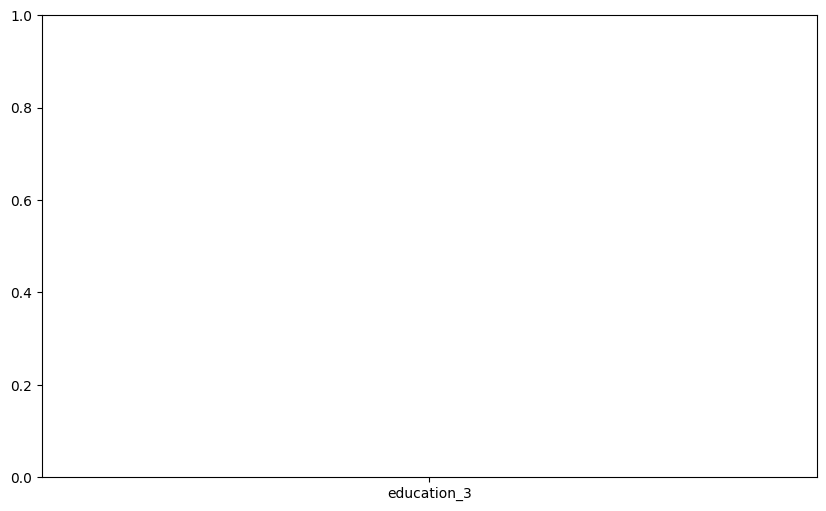

In [45]:
X = preprocessor.X
y = preprocessor.y


# Inicializar el selector de características
selector = FeatureSelector(X, y)

# 1. Selección de características con Chi-squared
chi2_result = selector.select_features_chi2(k=14)
FeatureVisualizer.plot_scores(chi2_result['features'], chi2_result['scores'], title='Chi-squared Scores')

# 2. Selección de características con Spearman
spearman_result = selector.select_features_spearman(threshold=0.01)
FeatureVisualizer.plot_correlations(spearman_result['selected_features'], spearman_result['correlations'], title='Spearman Correlation Coefficients')

# 3. Selección de características con Lasso
lasso_result = selector.lasso_feature_selection(alpha=0.01)
FeatureVisualizer.plot_coefficients(lasso_result['selected_features'], lasso_result['coefficients'], title='Lasso Coefficients')

# 4. Selección de características con Sequential Feature Selector
sfs_result = selector.sequential_feature_selection(n_features_to_select=13, direction='forward')
print("Sequential Feature Selection Selected Features:", sfs_result['selected_features'])

# 5. Importancia de características con Random Forest
rf_result = selector.random_forest_feature_importance(n_features=14)
FeatureVisualizer.plot_importances(rf_result['selected_features'], rf_result['importances'], title='Random Forest Feature Importances')